In [2]:
!pip install missingno

In [3]:

# Importing the rquired libraries
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score, explained_variance_score

In [4]:
# Reading the given dataset
manga = pd.read_csv("best.csv")

In [5]:
# Displaying the first five instances of the dataset
manga.head()

,Manga series,Author(s),Publisher,Demographic,No. of collected volumes,Serialized,Approximate sales in million(s),Average sales per volume in million(s)
0,One Piece,Eiichiro Oda,Shueisha,Shōnen,104,1997–present,516.6,4.97
1,Golgo 13,"Takao Saito, Saito Production",Shogakukan,Seinen,207,1968–present,300.0,1.45
2,Case Closed / Detective Conan,Gosho Aoyama,Shogakukan,Shōnen,102,1994–present,270.0,2.65
3,Dragon Ball,Akira Toriyama,Shueisha,Shōnen,42,1984–1995,260.0,6.19
4,Doraemon,Fujiko F. Fujio,Shogakukan,Children,45,1969–1996,250.0,4.71


In [6]:
# Checking for missing values
manga.isnull().sum()


Manga series                              0
Author(s)                                 0
Publisher                                 0
Demographic                               0
No. of collected volumes                  0
Serialized                                0
Approximate sales in million(s)           0
Average sales per volume in million(s)    0
dtype: int64

<Axes: >

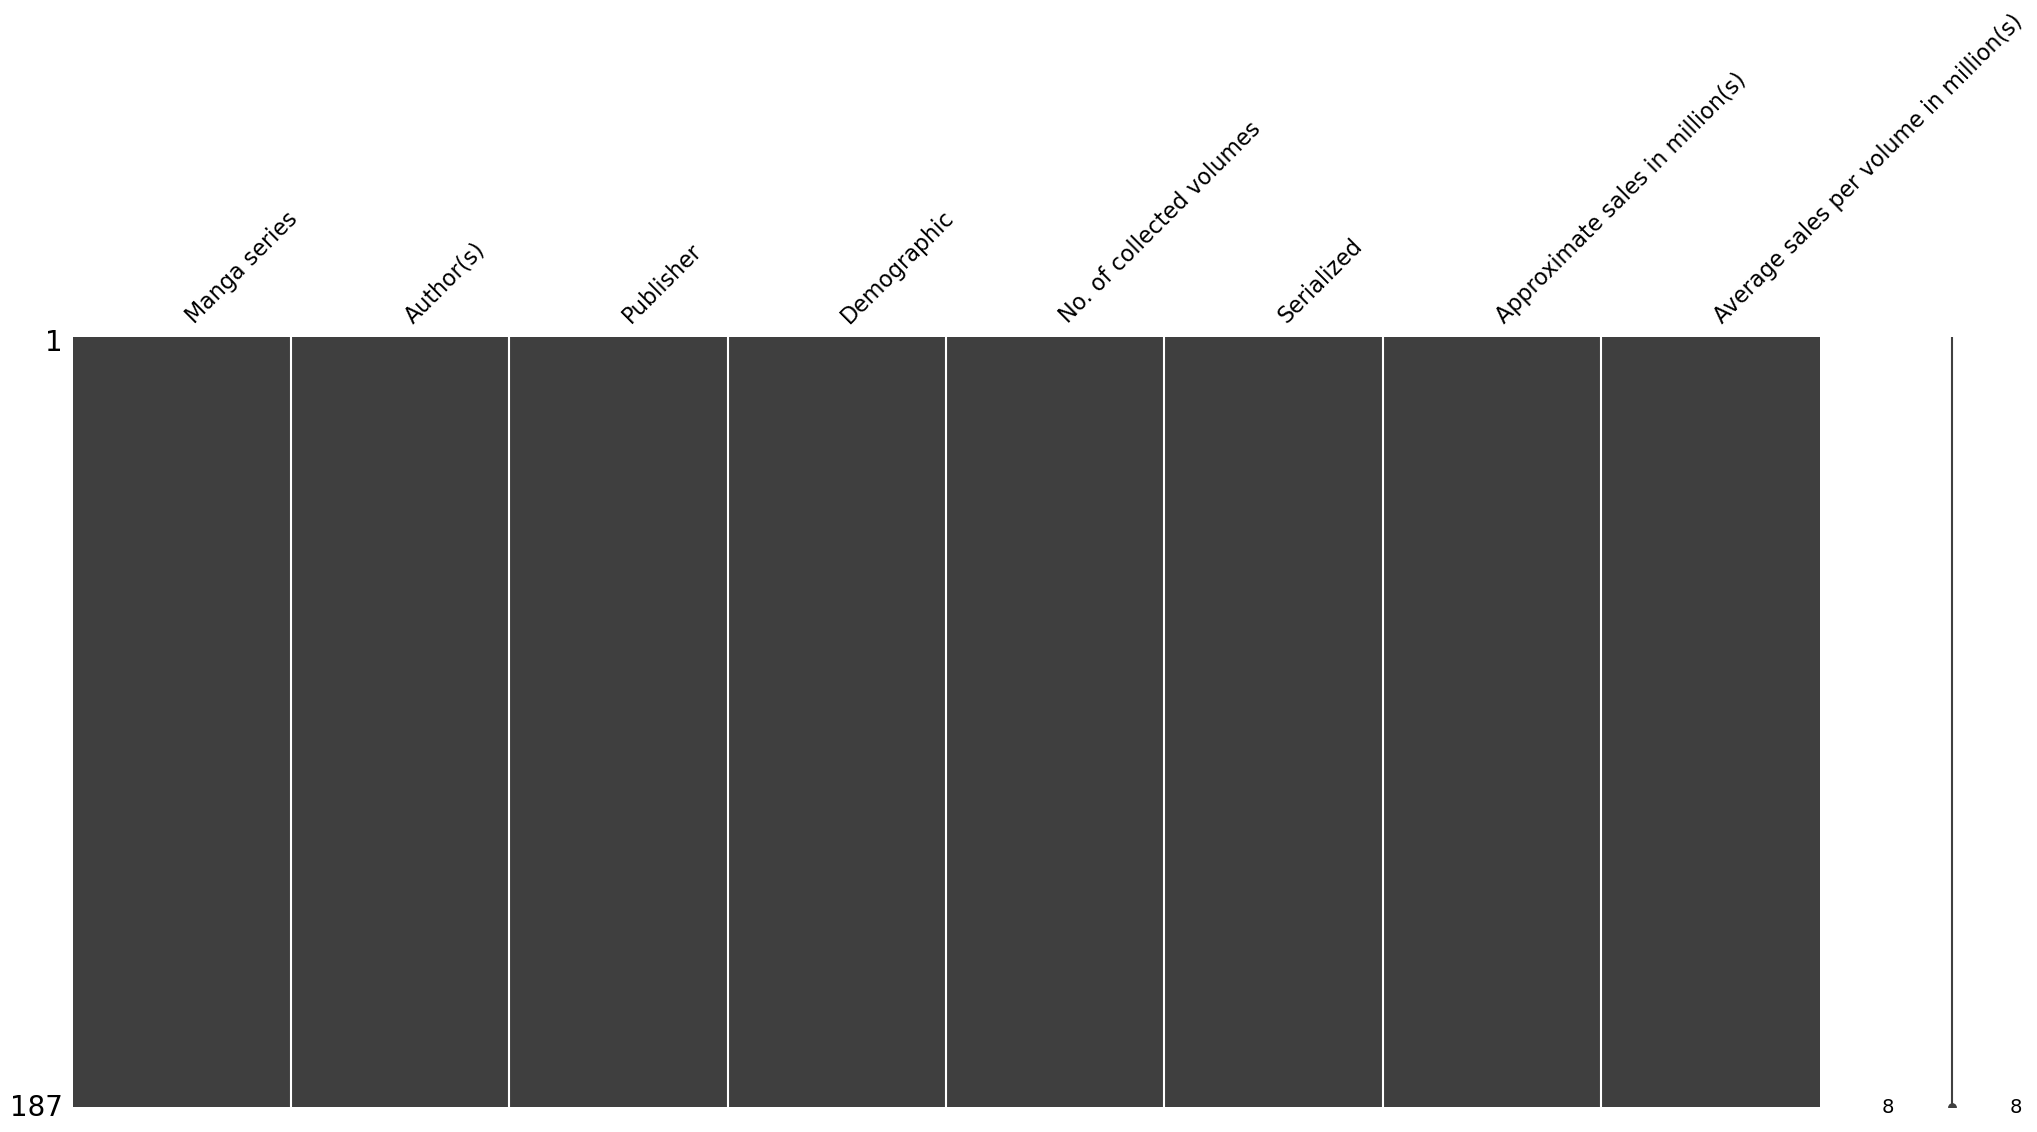

In [7]:
# Visualizing the number of missing values
msno.matrix(manga)

In [8]:
# Count the occurrences of different demographics in the manga DataFrame
demographic_counts = manga['Demographic'].value_counts()
print(demographic_counts)

Shōnen                101
Seinen                 50
Shōjo                  21
Shōnen/Seinen           6
Children                4
Josei                   2
—                       1
Shōjo/Josei             1
Shōnen/shōjo/Josei      1
Name: Demographic, dtype: int64


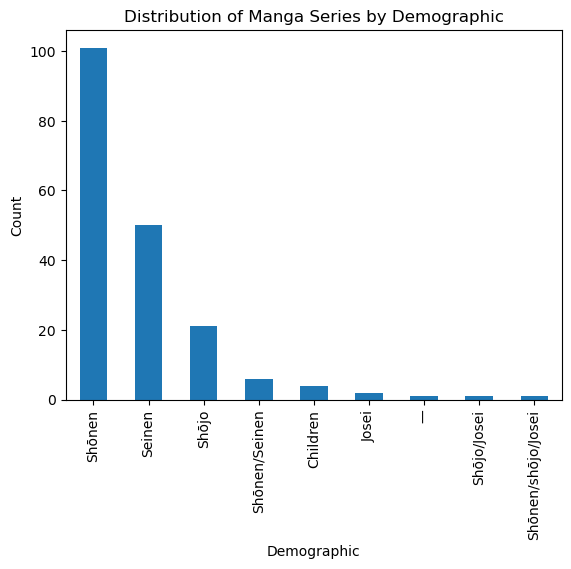

In [9]:
#Count the number of manga series in each demographics
demographic_counts.plot(kind='bar')
plt.xlabel('Demographic')
plt.ylabel('Count')
plt.title('Distribution of Manga Series by Demographic')
plt.show()

In [10]:
#Ranking authors based on sales
# Calculating volumes to sales ratio
manga['Volume_to_Sales_Ratio'] = manga['Approximate sales in million(s)'] / manga['No. of collected volumes']



In [11]:
# Displaying the volume to sales ratio
manga[['Manga series', 'Volume_to_Sales_Ratio']]

,Manga series,Volume_to_Sales_Ratio
0,One Piece,4.967308
1,Golgo 13,1.449275
2,Case Closed / Detective Conan,2.647059
3,Dragon Ball,6.190476
4,Doraemon,5.555556
...,...,...
182,Sukeban Deka,0.909091
183,Swan,0.952381
184,The Tale of Genji,1.538462
185,Tokyo Daigaku Monogatari,0.588235


In [12]:
# Sorting the authors based on the ratio in descending order
top_authors = manga.groupby('Author(s)')['Approximate sales in million(s)'].sum().sort_values(ascending=False)

In [13]:
# Displaying the top authors
top_authors


Author(s)
Eiichiro Oda                       516.6
Takao Saito, Saito Production      300.0
Akira Toriyama                     295.0
Gosho Aoyama                       270.0
Takehiko Inoue                     252.0
                                   ...  
Chie Shinohara                      20.0
Riichiro Inagaki, Yusuke Murata     20.0
Waki Yamato                         20.0
Shinji Wada                         20.0
Yūto Tsukuda, Shun Saeki            20.0
Name: Approximate sales in million(s), Length: 164, dtype: float64

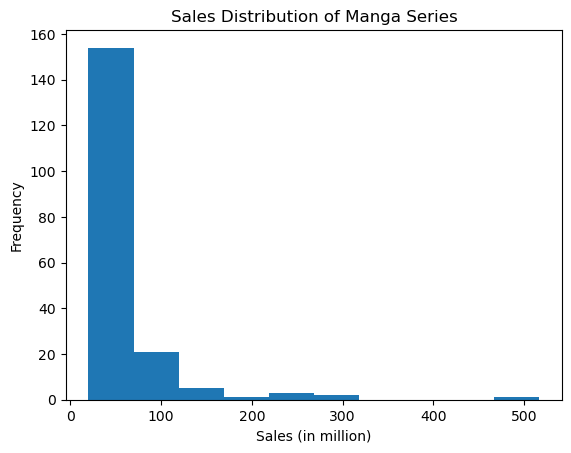

In [14]:
#Visualizing the sales of the different manga series
plt.hist(manga['Approximate sales in million(s)'], bins=10)
plt.xlabel('Sales (in million)')
plt.ylabel('Frequency')
plt.title('Sales Distribution of Manga Series')
plt.show()

In [15]:
#Analizing the longevity of different manga series
manga['Years_Serialized'] = manga['Serialized'].str.extract(r'(\d{4})').astype(int)
average_lifespan = manga['Years_Serialized'].mean() # average lifespan of a series
oldest_series = manga.loc[manga['Years_Serialized'].idxmin(), 'Manga series'] # finding the oldest series
newest_series = manga.loc[manga['Years_Serialized'].idxmax(), 'Manga series'] # finding the newest series

In [16]:
# Displaying the averag life-span of a manga series
print("The average life-span of a manga series : ",average_lifespan)

The average life-span of a manga series :  1992.8181818181818


In [17]:
# Displaying the oldest manga series
print("The oldest series in the dataset : ",oldest_series)

The oldest series in the dataset :  Sazae-san


In [18]:
# Displaying the newest manga series
print("The newest series in the dataset : ",newest_series)

The newest series in the dataset :  Spy × Family


In [19]:
#Analyzing the publisher performance
# Sorting the publishers based on the sales in descending order
publisher_sales = manga.groupby('Publisher')['Approximate sales in million(s)'].sum().sort_values(ascending=False)

In [20]:
# Displaying the top publishers
publisher_sales

Publisher
Shueisha                                     4083.10
Kodansha                                     1994.33
Shogakukan                                   1855.50
Akita Shoten                                  463.00
Hakusensha                                    231.10
Nihon Bungeisha                               108.00
Kobunsha                                      100.00
Futabasha                                      88.00
Shōnen Gahōsha                                 84.00
Enix (2001–2003), Square Enix (2003–2010)      80.00
Ushio Shuppansha                               80.00
Square Enix                                    63.00
Jitsugyo no Nihon Sha                          46.00
Kadokawa Shoten                                45.00
Shueisha/Kodansha                              38.00
Shinchosha, Tokuma Shoten                      25.00
Square Enix, Ichijinsha                        25.00
Gakken                                         23.00
Enix                                

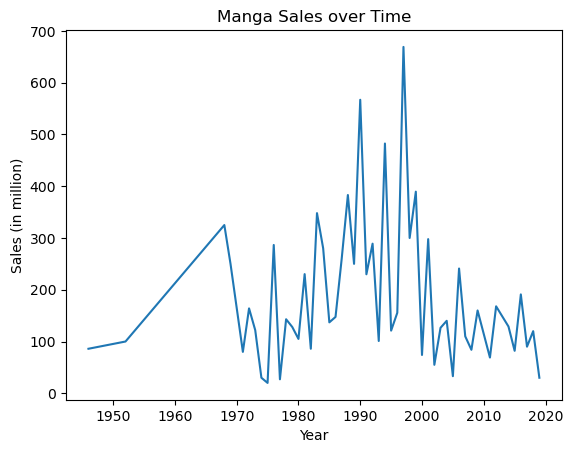

In [21]:
#Time series analysis
manga['Year'] = manga['Serialized'].str.extract(r'(\d{4})').astype(int)
sales_by_year = manga.groupby('Year')['Approximate sales in million(s)'].sum()
sales_by_year.plot()
plt.xlabel('Year')
plt.ylabel('Sales (in million)')
plt.title('Manga Sales over Time')
plt.show()

In [22]:
#Market Share by Publishers
total_sales = manga['Approximate sales in million(s)'].sum()
market_share = manga.groupby('Publisher')['Approximate sales in million(s)'].sum() / total_sales * 100

In [23]:
# Displaying the market share of each publisher
market_share

Publisher
Akita Shoten                                  4.877314
Enix                                          0.220164
Enix (2001–2003), Square Enix (2003–2010)     0.842732
Futabasha                                     0.927006
Gakken                                        0.242286
Hakusensha                                    2.434443
Jitsugyo no Nihon Sha                         0.484571
Kadokawa Shoten                               0.474037
Kobunsha                                      1.053416
Kodansha                                     21.008582
Nihon Bungeisha                               1.137689
Shinchosha, Tokuma Shoten                     0.263354
Shogakukan                                   19.546125
Shueisha                                     43.012010
Shueisha/Kodansha                             0.400298
Shueisha/Shogakukan/Leed                      0.210683
Shōnen Gahōsha                                0.884869
Square Enix                                   0.663652


In [24]:
#Revenue Analysis
# Calculate revenue generated by each manga series and calculate total revenue
manga['Revenue'] = manga['Approximate sales in million(s)'] * manga['Average sales per volume in million(s)']
total_revenue = manga['Revenue'].sum()

In [25]:
# Displyaing the total revenue
print(" The total revenue of the manga series : ", total_revenue)

 The total revenue of the manga series :  19977.935899999997


In [26]:
#Visualizing Market Share
# Calculating the revenue of the dataset
manga['Revenue'] = manga['Approximate sales in million(s)'] * manga['Average sales per volume in million(s)']


In [27]:
# Calculate the market share based on revenue
market_share = manga['Revenue'] / manga['Revenue'].sum()

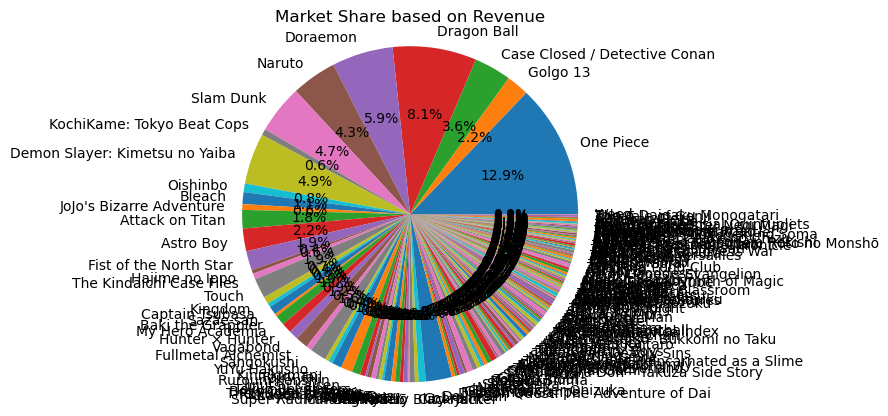

In [28]:
# Plotting the market share as a pie chart
plt.pie(market_share, labels=manga['Manga series'], autopct='%1.1f%%')
plt.title('Market Share based on Revenue')
plt.axis('equal')
plt.show()

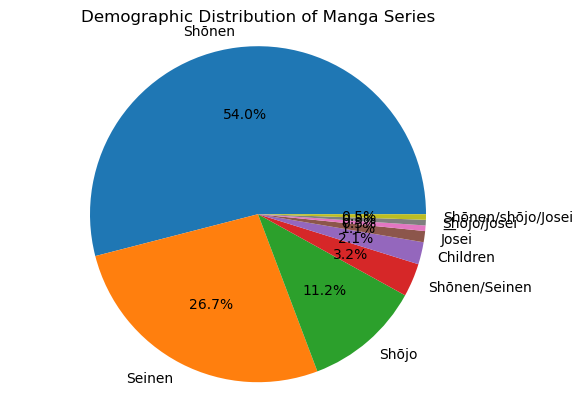

In [29]:
#Visualization of demographic data
# Visualization: Pie chart of Demographic Distribution
demographic_counts = manga['Demographic'].value_counts()
plt.pie(demographic_counts, labels=demographic_counts.index, autopct='%1.1f%%')
plt.title('Demographic Distribution of Manga Series')
plt.axis('equal')
plt.show()

In [30]:
#Visualization of genre popularity
# Calculate total sales by genre
genre_sales = manga.groupby('Demographic')['Approximate sales in million(s)'].sum()


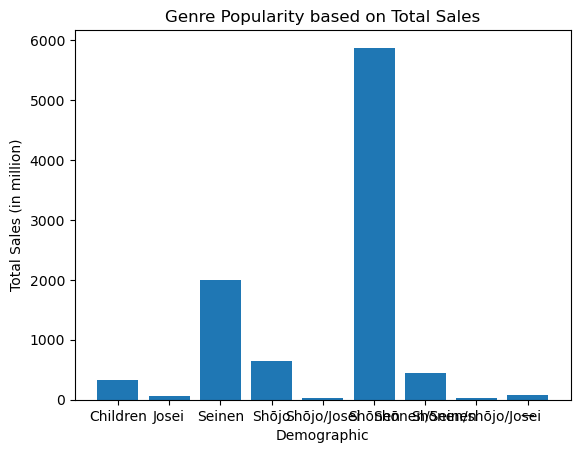

In [31]:
# Plot genre popularity based on total sales
plt.bar(genre_sales.index, genre_sales)
plt.xlabel('Demographic')
plt.ylabel('Total Sales (in million)')
plt.title('Genre Popularity based on Total Sales')
plt.show()

In [32]:
#Finding the relationship between the year and the number of sales
# Calculate the years of serialization for each manga series
manga['Years_Serialized'] = manga['Serialized'].str.extract(r'(\d{4})').astype(int)

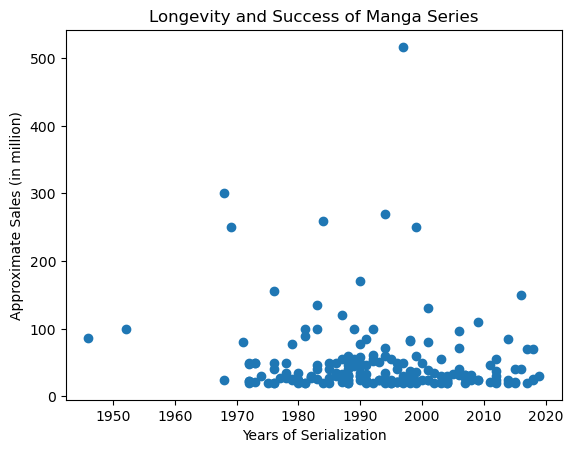

In [33]:
# Plot the relationship between years of serialization and sales
plt.scatter(manga['Years_Serialized'], manga['Approximate sales in million(s)'])
plt.xlabel('Years of Serialization')
plt.ylabel('Approximate Sales (in million)')
plt.title('Longevity and Success of Manga Series')
plt.show()

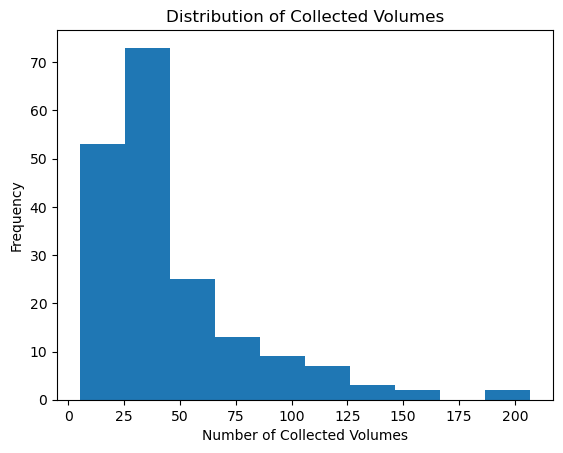

In [34]:
#Visualizing the distribution of volumes across manga series
# Plot the distribution of collected volumes
plt.hist(manga['No. of collected volumes'], bins=10)
plt.xlabel('Number of Collected Volumes')
plt.ylabel('Frequency')
plt.title('Distribution of Collected Volumes')
plt.show()

In [35]:
#Visualizing the total sales for each publisher
# Calculate the total sales for each publisher
publisher_sales = manga.groupby('Publisher')['Approximate sales in million(s)'].sum()

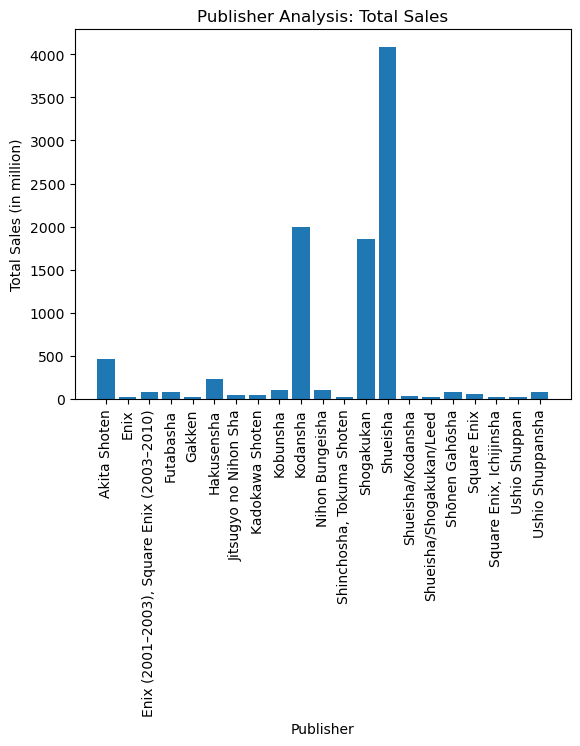

In [36]:
# Plot the total sales for each publisher
plt.bar(publisher_sales.index, publisher_sales)
plt.xlabel('Publisher')
plt.ylabel('Total Sales (in million)')
plt.title('Publisher Analysis: Total Sales')
plt.xticks(rotation=90)
plt.show()

In [37]:
#Model Building
# Prepare the features and target variable
X = manga[['No. of collected volumes', 'Average sales per volume in million(s)']] # features used for analysis
y = manga['Approximate sales in million(s)'] # feature to predict


In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [41]:
# Calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)

In [42]:
# Print the evaluation metrics
print("Mean Squared Error: ",mse)
print("Mean Absolute Error: ", mae)
print("R-squared: ", r2)
print("Explained Variance Score: ", explained_variance)
print("Mean Absolute Error: ", mae)
print("R-squared: ", r2)
print("Explained Variance Score: ", explained_variance)

Mean Squared Error:  551.4145337219688
Mean Absolute Error:  14.053354026733242
R-squared:  0.7153258854529804
Explained Variance Score:  0.725111021604349
Mean Absolute Error:  14.053354026733242
R-squared:  0.7153258854529804
Explained Variance Score:  0.725111021604349
